In [1]:
import functions

# Analyze the dataframe

Get general informations about the dataframe (size/elements/types..), as well as the main metric to check 'missing rate'.

### <i>purpose: Check the missingness rate of the features before introduce the benchmark (based on missingness rate/type). </i>

In [2]:
csv_path = "../data/node1/extracted_vital_signs.csv"
original_dataframe = functions.analyze_dataframe(csv_path=csv_path)

Dataset loaded from: ../data/node1/extracted_vital_signs.csv

## DATAFRAME OVERVIEW
----------------------------------------


,Metric,Value
0,Rows,996
1,Columns,10
2,Total Elements,9960
3,Memory Usage (MB),0.19



## COLUMN INFORMATION
----------------------------------------


,Column,Type,Unique Values,Unique %,Missing Count,Missing %
0,subject_id,int64,5,0.5%,0,0.00%
1,hadm_id,int64,7,0.7%,0,0.00%
2,charttime,object,996,100.0%,0,0.00%
3,heart_rate,float64,83,8.3%,536,53.82%
4,blood_pressure_systolic,float64,58,5.8%,854,85.74%
5,blood_pressure_diastolic,float64,48,4.8%,840,84.34%
6,respiratory_rate,float64,25,2.5%,506,50.80%
7,spo2,float64,16,1.6%,523,52.51%
8,gender,object,2,0.2%,0,0.00%
9,anchor_age,int64,4,0.4%,0,0.00%



## SAMPLE DATA (First 5 rows)
----------------------------------------


,subject_id,hadm_id,charttime,heart_rate,blood_pressure_systolic,blood_pressure_diastolic,respiratory_rate,spo2,gender,anchor_age
0,10000690,25860671,2150-11-02 19:54:00,NaN,NaN,NaN,NaN,100.0,F,86
1,10000690,25860671,2150-11-02 20:00:00,NaN,NaN,NaN,23.0,100.0,F,86
2,10000690,25860671,2150-11-02 21:00:00,NaN,NaN,NaN,NaN,98.0,F,86
3,10000690,25860671,2150-11-02 22:00:00,NaN,NaN,NaN,20.0,99.0,F,86
4,10000690,25860671,2150-11-02 23:00:00,NaN,NaN,NaN,NaN,99.0,F,86



## MISSINGNESS SUMMARY
----------------------------------------
Features with missing values: 5 out of 10
Features with missing values: heart_rate, blood_pressure_systolic, blood_pressure_diastolic, respiratory_rate, spo2

Top features with highest missingness:


,Column,Missing Count,Missing %
4,blood_pressure_systolic,854,85.74%
5,blood_pressure_diastolic,840,84.34%
3,heart_rate,536,53.82%
7,spo2,523,52.51%
6,respiratory_rate,506,50.80%
0,subject_id,0,0.00%
1,hadm_id,0,0.00%
2,charttime,0,0.00%
8,gender,0,0.00%
9,anchor_age,0,0.00%


# Pruposed solution : Create a clean subset first
This approach creates a completely clean dataset by removing all rows with missing values within the target feature:
this gives us a clean slate with 0% missing values, then we can apply the introduce_missingness() function to this dataset with our desired missing rate also with the desired missing type, as well as benefit from the real values of missing data for evaluation and test performance.
###### <i>RQ: <u>Usually we need just one feature to test the impuatating stategies on it, but if we apply the MAR pattern we should have other cleaned feature.</i></u>

To choose features for MAR missingness analysis, we will follow these steps:
- Look for variables that are well-populated (few missing values) (check the previous step output)
- Evaluate relationships by checking the correlations between potential variables. (Spearman rank correlation - Mutual Information (MI))

### Evaluate relationships :
Starting by Spearman rank correlations(not just linear), +1: Indicates a perfect positive monotonic relationship. 
-1: Indicates a perfect negative monotonic relationship. 
0: Indicates no monotonic relationship between the ranks of the two variables.


=== NaN Values in Numeric Columns ===
  - heart_rate: 536 NaN values (53.82%)
  - blood_pressure_systolic: 854 NaN values (85.74%)
  - blood_pressure_diastolic: 840 NaN values (84.34%)
  - respiratory_rate: 506 NaN values (50.80%)
  - spo2: 523 NaN values (52.51%)

Note: NaN values will be automatically excluded from pairwise correlation calculations.

These rows will be excluded when calculating correlations.

=== Spearman Rank Correlation with target: respiratory_rate ===
                          Spearman Correlation  Valid Observations  \
respiratory_rate                      1.000000                 NaN   
heart_rate                            0.470270               208.0   
anchor_age                            0.378703               490.0   
hadm_id                               0.287663               490.0   
subject_id                            0.126516               490.0   
blood_pressure_diastolic              0.037188                59.0   
blood_pressure_systolic       

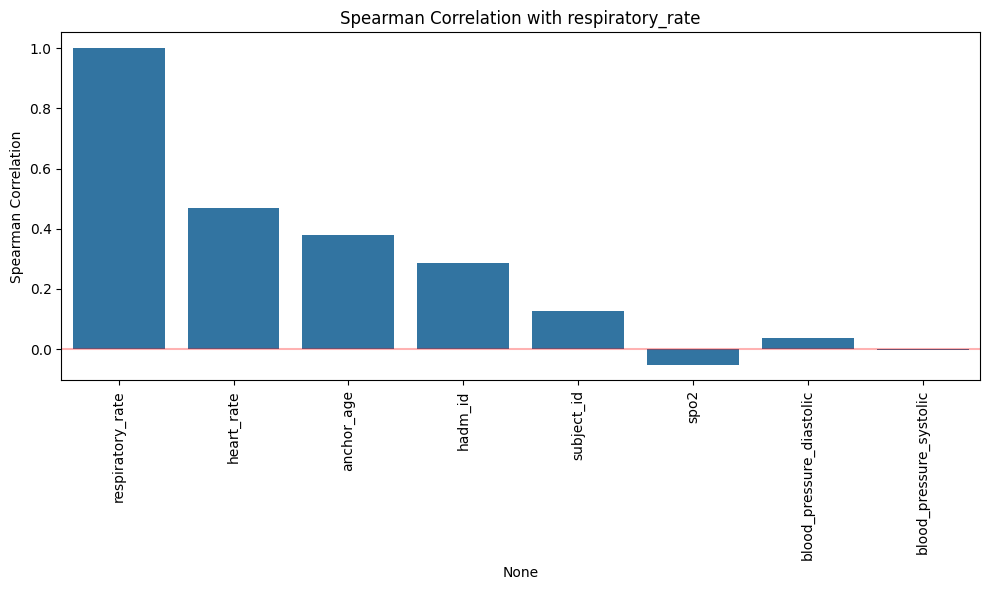

,Spearman Correlation,Valid Observations,% of Data Used
respiratory_rate,1.000000,NaN,nan%
heart_rate,0.470270,208.0,20.88%
anchor_age,0.378703,490.0,49.2%
hadm_id,0.287663,490.0,49.2%
subject_id,0.126516,490.0,49.2%
blood_pressure_diastolic,0.037188,59.0,5.92%
blood_pressure_systolic,-0.001616,65.0,6.53%
spo2,-0.050961,180.0,18.07%


In [3]:
#Defining the target column after checking the missingness rate 
target_column = "respiratory_rate" 
functions.calculate_spearman_correlation(original_dataframe,target_col=target_column)

To emphasize the features choise, we will apply the Mutual Information (MI) to capture any statistical dependency, not just linear. ( I(X;Y)≥0   e.g. above 2.0 or so, though this is context-dependent) 


=== NaN Values in Numeric Columns ===
  - heart_rate: 536 NaN values (53.82%)
  - blood_pressure_systolic: 854 NaN values (85.74%)
  - blood_pressure_diastolic: 840 NaN values (84.34%)
  - respiratory_rate: 506 NaN values (50.80%)
  - spo2: 523 NaN values (52.51%)

Note: NaN values will be excluded on a pairwise basis for each feature-target pair.

Rows with NaN in the target will be excluded from all calculations.

=== Mutual Information with target: respiratory_rate ===
                    Feature  MI Score  Valid Observations % of Data Used
6                anchor_age  0.168560                 490          49.2%
2                heart_rate  0.132000                 208         20.88%
1                   hadm_id  0.125056                 490          49.2%
0                subject_id  0.038870                 490          49.2%
3   blood_pressure_systolic  0.038203                  65          6.53%
5                      spo2  0.005355                 180         18.07%
4  blood_pr

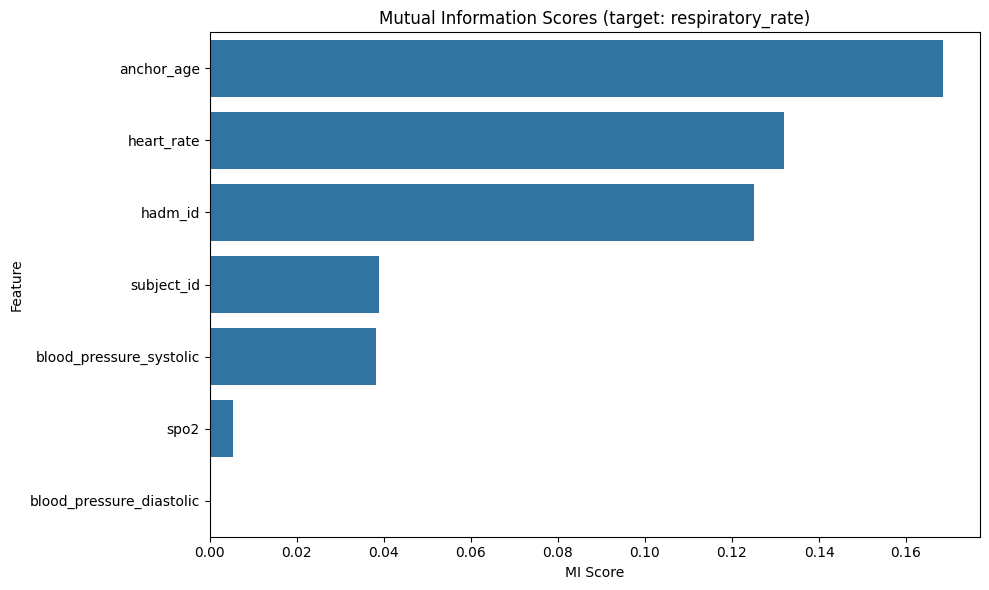


  - anchor_age: 49.2% of data used
  - heart_rate: 20.88% of data used
  - hadm_id: 49.2% of data used
  - subject_id: 49.2% of data used
  - blood_pressure_systolic: 6.53% of data used
  - spo2: 18.07% of data used
  - blood_pressure_diastolic: 5.92% of data used


,Feature,MI Score,Valid Observations,% of Data Used
6,anchor_age,0.168560,490,49.2%
2,heart_rate,0.132000,208,20.88%
1,hadm_id,0.125056,490,49.2%
0,subject_id,0.038870,490,49.2%
3,blood_pressure_systolic,0.038203,65,6.53%
5,spo2,0.005355,180,18.07%
4,blood_pressure_diastolic,0.000000,59,5.92%


In [4]:
functions.calculate_mutual_information(original_dataframe,target_column)

After the evaluation of the metrices, we have a comprehensive idea about variables relationship to select appropriate features for your MAR analysis.

In [5]:
feature1 = target_column
feature2 = "heart_rate"

Clean the dataset to have a slat with 0% of missingness to test the imputation strategies based on missing rate/type . 

In [6]:
cleaned_dataframe = functions.prepare_clean_dataset(original_dataframe,feature1=feature1,feature2=feature2) 

Original dataset: 996 rows
Clean dataset: 208 rows (20.88% of original)

Missing values summary:
respiratory_rate: 506 missing values
heart_rate: 536 missing values
Rows missing either feature: 788


### Check the missing rates.

In [7]:
functions.analyze_dataframe(df=cleaned_dataframe)


## DATAFRAME OVERVIEW
----------------------------------------


,Metric,Value
0,Rows,208
1,Columns,10
2,Total Elements,2080
3,Memory Usage (MB),0.04



## COLUMN INFORMATION
----------------------------------------


,Column,Type,Unique Values,Unique %,Missing Count,Missing %
0,subject_id,int64,5,2.4%,0,0.00%
1,hadm_id,int64,7,3.4%,0,0.00%
2,charttime,object,208,100.0%,0,0.00%
3,heart_rate,float64,73,35.1%,0,0.00%
4,blood_pressure_systolic,float64,22,10.6%,181,87.02%
5,blood_pressure_diastolic,float64,21,10.1%,181,87.02%
6,respiratory_rate,float64,21,10.1%,0,0.00%
7,spo2,float64,11,5.3%,135,64.90%
8,gender,object,2,1.0%,0,0.00%
9,anchor_age,int64,4,1.9%,0,0.00%



## SAMPLE DATA (First 5 rows)
----------------------------------------


,subject_id,hadm_id,charttime,heart_rate,blood_pressure_systolic,blood_pressure_diastolic,respiratory_rate,spo2,gender,anchor_age
15,10000690,25860671,2150-11-03 13:00:00,84.0,NaN,NaN,19.0,NaN,F,86
25,10000690,25860671,2150-11-03 23:00:00,61.0,NaN,NaN,15.0,NaN,F,86
27,10000690,25860671,2150-11-04 01:00:00,62.0,NaN,NaN,24.0,NaN,F,86
32,10000690,25860671,2150-11-04 06:00:00,62.0,NaN,NaN,14.0,100.0,F,86
37,10000690,25860671,2150-11-04 12:00:00,86.0,NaN,NaN,16.0,NaN,F,86



## MISSINGNESS SUMMARY
----------------------------------------
Features with missing values: 3 out of 10
Features with missing values: blood_pressure_systolic, blood_pressure_diastolic, spo2

Top features with highest missingness:


,Column,Missing Count,Missing %
4,blood_pressure_systolic,181,87.02%
5,blood_pressure_diastolic,181,87.02%
7,spo2,135,64.90%
0,subject_id,0,0.00%
1,hadm_id,0,0.00%
2,charttime,0,0.00%
3,heart_rate,0,0.00%
6,respiratory_rate,0,0.00%
8,gender,0,0.00%
9,anchor_age,0,0.00%


,subject_id,hadm_id,charttime,heart_rate,blood_pressure_systolic,blood_pressure_diastolic,respiratory_rate,spo2,gender,anchor_age
15,10000690,25860671,2150-11-03 13:00:00,84.0,NaN,NaN,19.0,NaN,F,86
25,10000690,25860671,2150-11-03 23:00:00,61.0,NaN,NaN,15.0,NaN,F,86
27,10000690,25860671,2150-11-04 01:00:00,62.0,NaN,NaN,24.0,NaN,F,86
32,10000690,25860671,2150-11-04 06:00:00,62.0,NaN,NaN,14.0,100.0,F,86
37,10000690,25860671,2150-11-04 12:00:00,86.0,NaN,NaN,16.0,NaN,F,86
...,...,...,...,...,...,...,...,...,...,...
967,10002430,26295318,2129-06-15 18:00:00,77.0,NaN,NaN,17.0,NaN,M,86
980,10002760,28094813,2141-04-20 22:00:00,70.0,NaN,NaN,16.0,99.0,M,56
988,10002760,28094813,2141-04-21 05:00:00,59.0,96.0,64.0,16.0,NaN,M,56
990,10002760,28094813,2141-04-21 07:00:00,65.0,NaN,NaN,10.0,99.0,M,56


# Introduce missing values
This step introduce the missingness within the specific feature by given the missing rate (0.1 - 0.3 - 0.5) and type (MCAR - MAR - MNAR), also returning a ground truth DataFrame containing the original values and missingness information for later evaluation. 
###### <i>RQ: <u>We need a target variable in the MAR (Missing At Random) pattern.</i></u>

In [8]:
missing_rate = 0.2
pattern = 'MCAR'

data_with_missingness , origina_values = functions.introduce_missingness(df=cleaned_dataframe,feature=feature1,target=feature2,missing_rate=missing_rate,pattern=pattern)

Missingness pattern: MCAR
Original missing rate: 0.00%
Added 41 missing values
Final missing rate: 19.71%


### -> Trainning of the federated learning model
Load the model to impute missing data . (The model is trainned based on data across nodes, using the federated learning approche) 

In [ ]:

features = ['heart_rate','gender']
target = "respiratory_rate"

result_dataframe = functions.return_regression_results(data_with_missingness,features,target)

Loaded statistical metrics - Mean: 20.043398620035063, Median: 20.385150812064968
Added column 'respiratory_rate_agg_mean' with value 20.043398620035063
Added column 'respiratory_rate_agg_median' with value 20.385150812064968
Added column 'respiratory_rate_avg_predictions' with average of: respiratory_rate_ml, respiratory_rate_dl, respiratory_rate_agg_mean, respiratory_rate_agg_median
First row values: [19.811596, 19.891588, 20.043398620035063, 20.385150812064968]
First row average: 20.03293338997691


C:\Users\BeeClick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\BeeClick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.4.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(

In [10]:
functions.analyze_dataframe(df=result_dataframe)


## DATAFRAME OVERVIEW
----------------------------------------


,Metric,Value
0,Rows,208
1,Columns,15
2,Total Elements,3120
3,Memory Usage (MB),0.06



## COLUMN INFORMATION
----------------------------------------


,Column,Type,Unique Values,Unique %,Missing Count,Missing %
0,subject_id,int64,5,2.4%,0,0.00%
1,hadm_id,int64,7,3.4%,0,0.00%
2,charttime,object,208,100.0%,0,0.00%
3,heart_rate,float64,73,35.1%,0,0.00%
4,blood_pressure_systolic,float64,22,10.6%,181,87.02%
5,blood_pressure_diastolic,float64,21,10.1%,181,87.02%
6,respiratory_rate,float64,21,10.1%,41,19.71%
7,spo2,float64,11,5.3%,135,64.90%
8,gender,object,2,1.0%,0,0.00%
9,anchor_age,int64,4,1.9%,0,0.00%



## SAMPLE DATA (First 5 rows)
----------------------------------------


,subject_id,hadm_id,charttime,heart_rate,blood_pressure_systolic,blood_pressure_diastolic,respiratory_rate,spo2,gender,anchor_age,respiratory_rate_dl,respiratory_rate_ml,respiratory_rate_agg_mean,respiratory_rate_agg_median,respiratory_rate_avg_predictions
15,10000690,25860671,2150-11-03 13:00:00,84.0,NaN,NaN,19.0,NaN,F,86,19.891588,19.811596,20.043399,20.385151,20.032934
25,10000690,25860671,2150-11-03 23:00:00,61.0,NaN,NaN,15.0,NaN,F,86,18.739088,18.317511,20.043399,20.385151,19.371287
27,10000690,25860671,2150-11-04 01:00:00,62.0,NaN,NaN,24.0,NaN,F,86,18.739088,18.382471,20.043399,20.385151,19.387527
32,10000690,25860671,2150-11-04 06:00:00,62.0,NaN,NaN,14.0,100.0,F,86,18.739088,18.382471,20.043399,20.385151,19.387527
37,10000690,25860671,2150-11-04 12:00:00,86.0,NaN,NaN,16.0,NaN,F,86,19.891588,19.941517,20.043399,20.385151,20.065414



## MISSINGNESS SUMMARY
----------------------------------------
Features with missing values: 4 out of 15
Features with missing values: blood_pressure_systolic, blood_pressure_diastolic, respiratory_rate, spo2

Top features with highest missingness:


,Column,Missing Count,Missing %
4,blood_pressure_systolic,181,87.02%
5,blood_pressure_diastolic,181,87.02%
7,spo2,135,64.90%
6,respiratory_rate,41,19.71%
0,subject_id,0,0.00%
1,hadm_id,0,0.00%
2,charttime,0,0.00%
3,heart_rate,0,0.00%
8,gender,0,0.00%
9,anchor_age,0,0.00%


,subject_id,hadm_id,charttime,heart_rate,blood_pressure_systolic,blood_pressure_diastolic,respiratory_rate,spo2,gender,anchor_age,respiratory_rate_dl,respiratory_rate_ml,respiratory_rate_agg_mean,respiratory_rate_agg_median,respiratory_rate_avg_predictions
15,10000690,25860671,2150-11-03 13:00:00,84.0,NaN,NaN,19.0,NaN,F,86,19.891588,19.811596,20.043399,20.385151,20.032934
25,10000690,25860671,2150-11-03 23:00:00,61.0,NaN,NaN,15.0,NaN,F,86,18.739088,18.317511,20.043399,20.385151,19.371287
27,10000690,25860671,2150-11-04 01:00:00,62.0,NaN,NaN,24.0,NaN,F,86,18.739088,18.382471,20.043399,20.385151,19.387527
32,10000690,25860671,2150-11-04 06:00:00,62.0,NaN,NaN,14.0,100.0,F,86,18.739088,18.382471,20.043399,20.385151,19.387527
37,10000690,25860671,2150-11-04 12:00:00,86.0,NaN,NaN,16.0,NaN,F,86,19.891588,19.941517,20.043399,20.385151,20.065414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,10002430,26295318,2129-06-15 18:00:00,77.0,NaN,NaN,17.0,NaN,M,86,19.989170,19.660000,20.043399,20.385151,20.019430
980,10002760,28094813,2141-04-20 22:00:00,70.0,NaN,NaN,16.0,99.0,M,56,18.739088,19.205276,20.043399,20.385151,19.593229
988,10002760,28094813,2141-04-21 05:00:00,59.0,96.0,64.0,16.0,NaN,M,56,18.739088,18.490715,20.043399,20.385151,19.414589
990,10002760,28094813,2141-04-21 07:00:00,65.0,NaN,NaN,10.0,99.0,M,56,18.739088,18.880476,20.043399,20.385151,19.512028
